<a href="https://colab.research.google.com/github/6FAN/Apriori-Algorithm/blob/main/Recommend_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Index

* 01: Importing Libraries
****
* 02: Feature Engineering
****
* 03: Data Visualization
****
* 04: Apriori Algorithm
****
* 05: Apriori Analysis
****
* 06: Association Rules
****
* 07: Making Recommendation
****

# 01: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_theme('paper')

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore',
                category=DeprecationWarning)

In [ ]:
df = pd.read_csv('/content/bread basket.csv')
df

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [ ]:
df.shape

(20507, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
df.columns

Index(['Transaction', 'Item', 'date_time', 'period_day', 'weekday_weekend'], dtype='object')

In [ ]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

**There is no missing value**

****

# 02: Feature Engineering

In [ ]:
#Count of Unique customers
df['Transaction'].nunique()

9465

In [ ]:
#Converting The Date_Time Column into Right Format
df['date_time'] = pd.to_datetime(
    df['date_time'])

In [ ]:
#Extracting date
df['date'] = df['date_time'].dt.date

In [ ]:
#Extracting time
df['time'] = df['date_time'].dt.time

In [ ]:
#Extracting month and replacing it with text
df['month'] = df['date_time'].dt.month

df['month'] = df['month'].replace(
    (1, 2, 3, 4, 5, 6, 7, 8,
     9, 10, 11, 12),
    ('January', 'February','March',
    'April','May','June','July',
    'August','September','October',
    'November','December'))

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October


In [ ]:
#Extracting Hour
df['hour'] = df['date_time'].dt.hour

In [ ]:
#Replacing hours with text
hour_in_num = (1,7,8,9,10,11,12,13,
        14,15,16,17,18,19,20,21,22,23)

hour_in_obj = ('1-2','7-8', '8-9',
    '9-10','10-11','11-12','12-13',
    '13-14','14-15','15-16','16-17',
    '17-18','18-19','19-20','20-21',
    '21-22','22-23','23-24')

df['hour'] = df['hour'].replace(
    hour_in_num, hour_in_obj)

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,9-10
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,10-11
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,10-11
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10-11
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10-11


In [ ]:
#Extracting weekday and replacing it with text
df['weekday'] = df['date_time'].dt.weekday

df['weekday'] = df['weekday'].replace(
    (0,1,2,3,4,5,6),
    ('Monday', 'Tuesday',
     'Wednesday', 'Thursday',
     'Friday', 'Saturday',
     'Sunday'))

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [ ]:
#Droping date_time column
df.drop('date_time',
        axis=1,
        inplace=True)

In [ ]:
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


In [ ]:
df['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Item, Length: 94, dtype: int64

In [ ]:
#Cleaning the item column
df['Item'] = df['Item'].str.lower()
df.head()

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday


****

# 03: Data Visualization

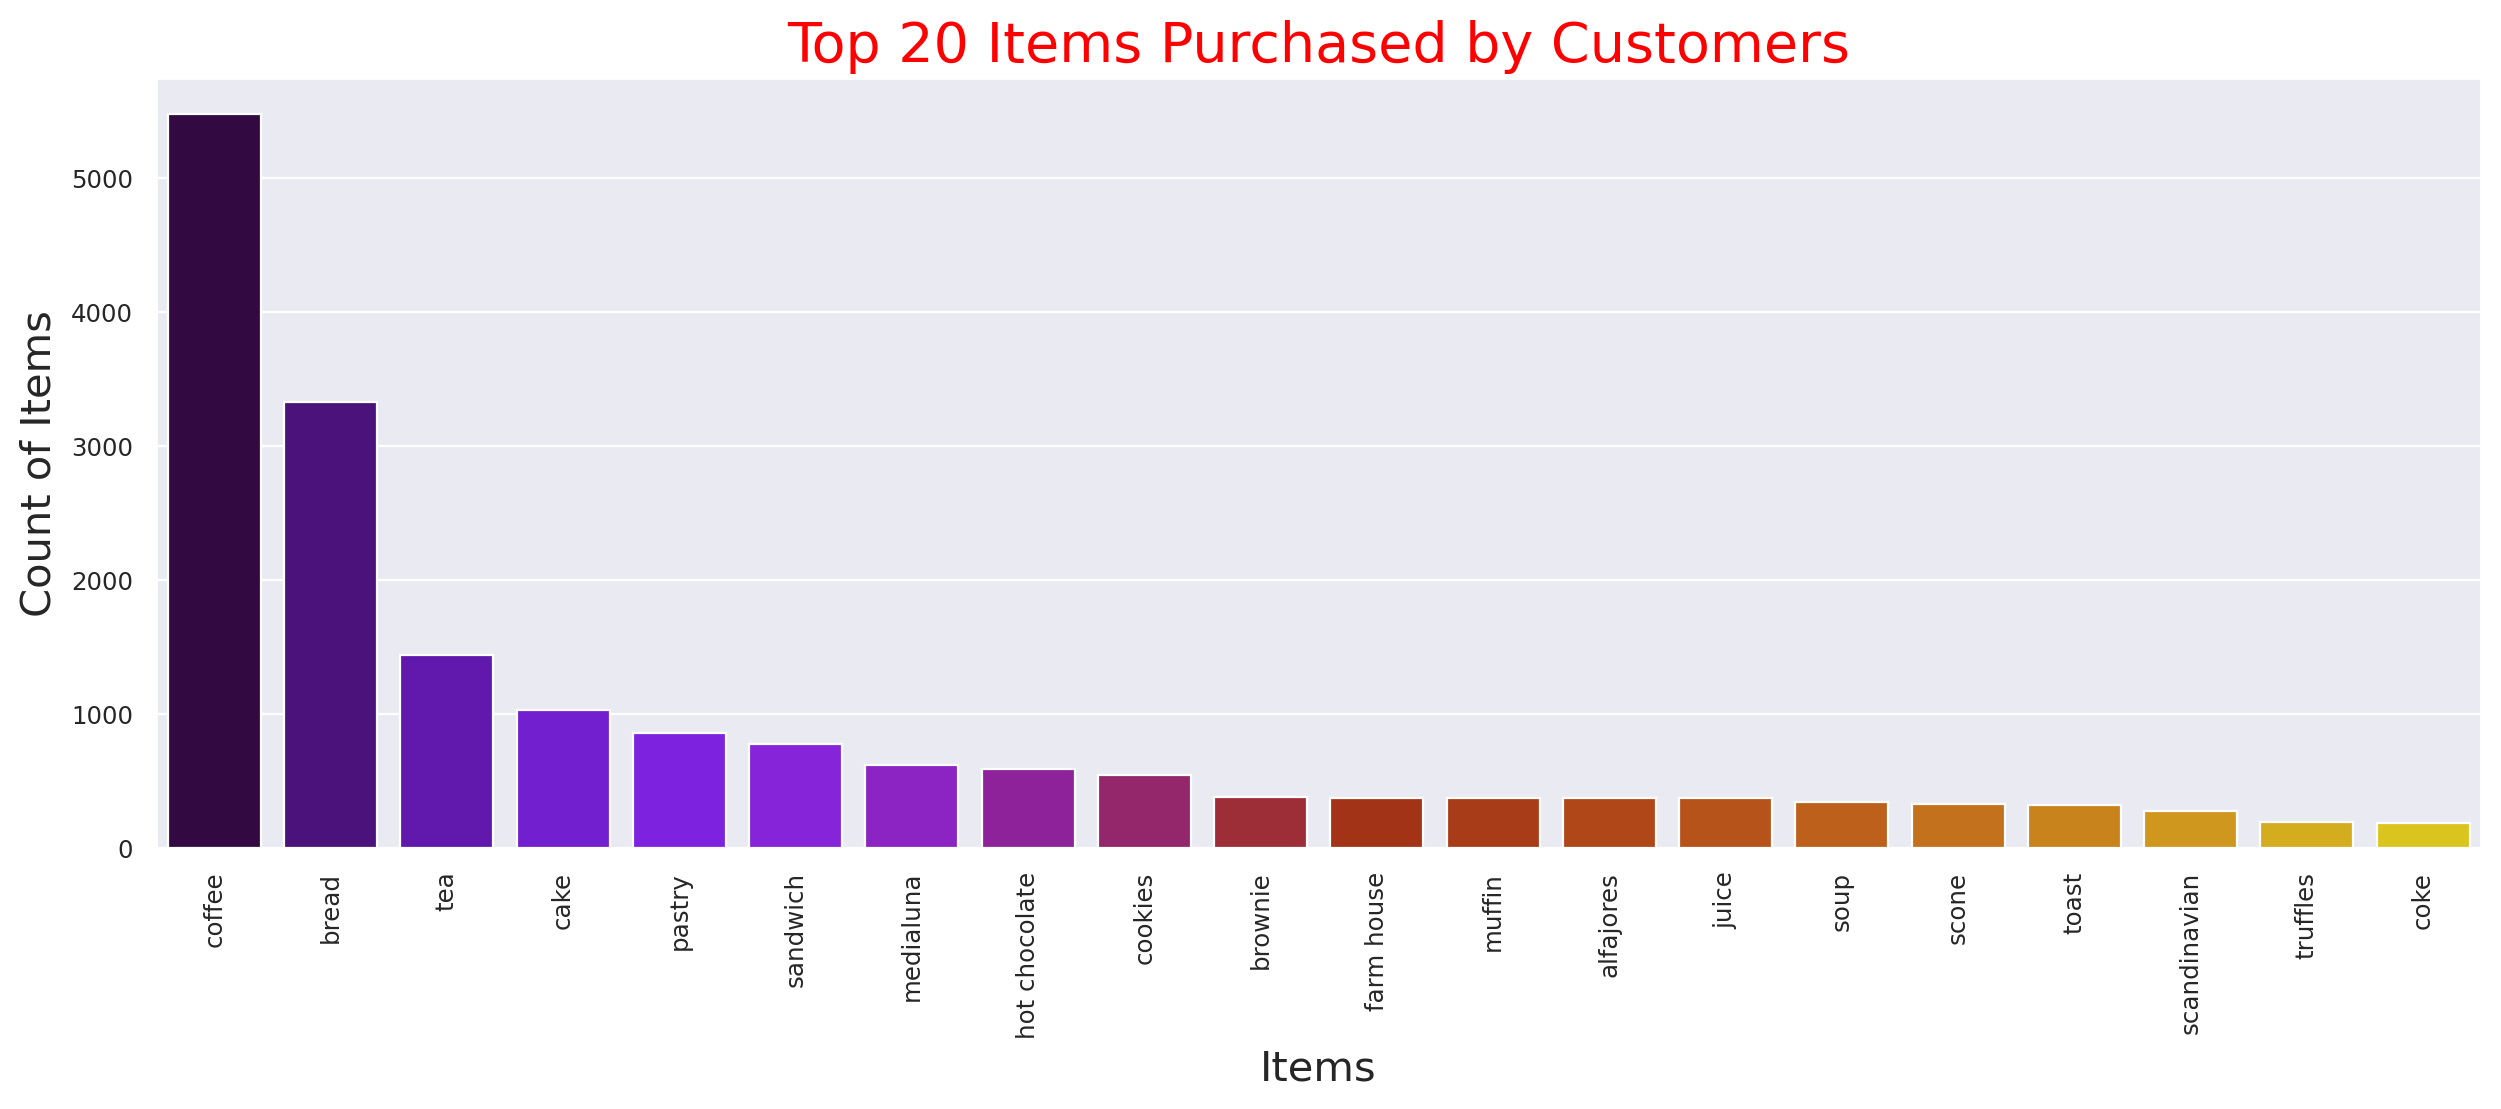

In [ ]:
x = df.Item.value_counts().head(20).index

y = df.Item.value_counts().head(20).values

plt.figure(figsize=(15,5))
sns.barplot(x=x, y=y,
            palette='gnuplot')

plt.xlabel('Items', size= 15)
plt.xticks(rotation = 90)
plt.ylabel('Count of Items',
           size=15)

plt.title('Top 20 Items Purchased by Customers',color='Red', size= 20)

plt.show()

**Coffee has the Highest Transactions.**

**Coke is the 20th most buyed product**

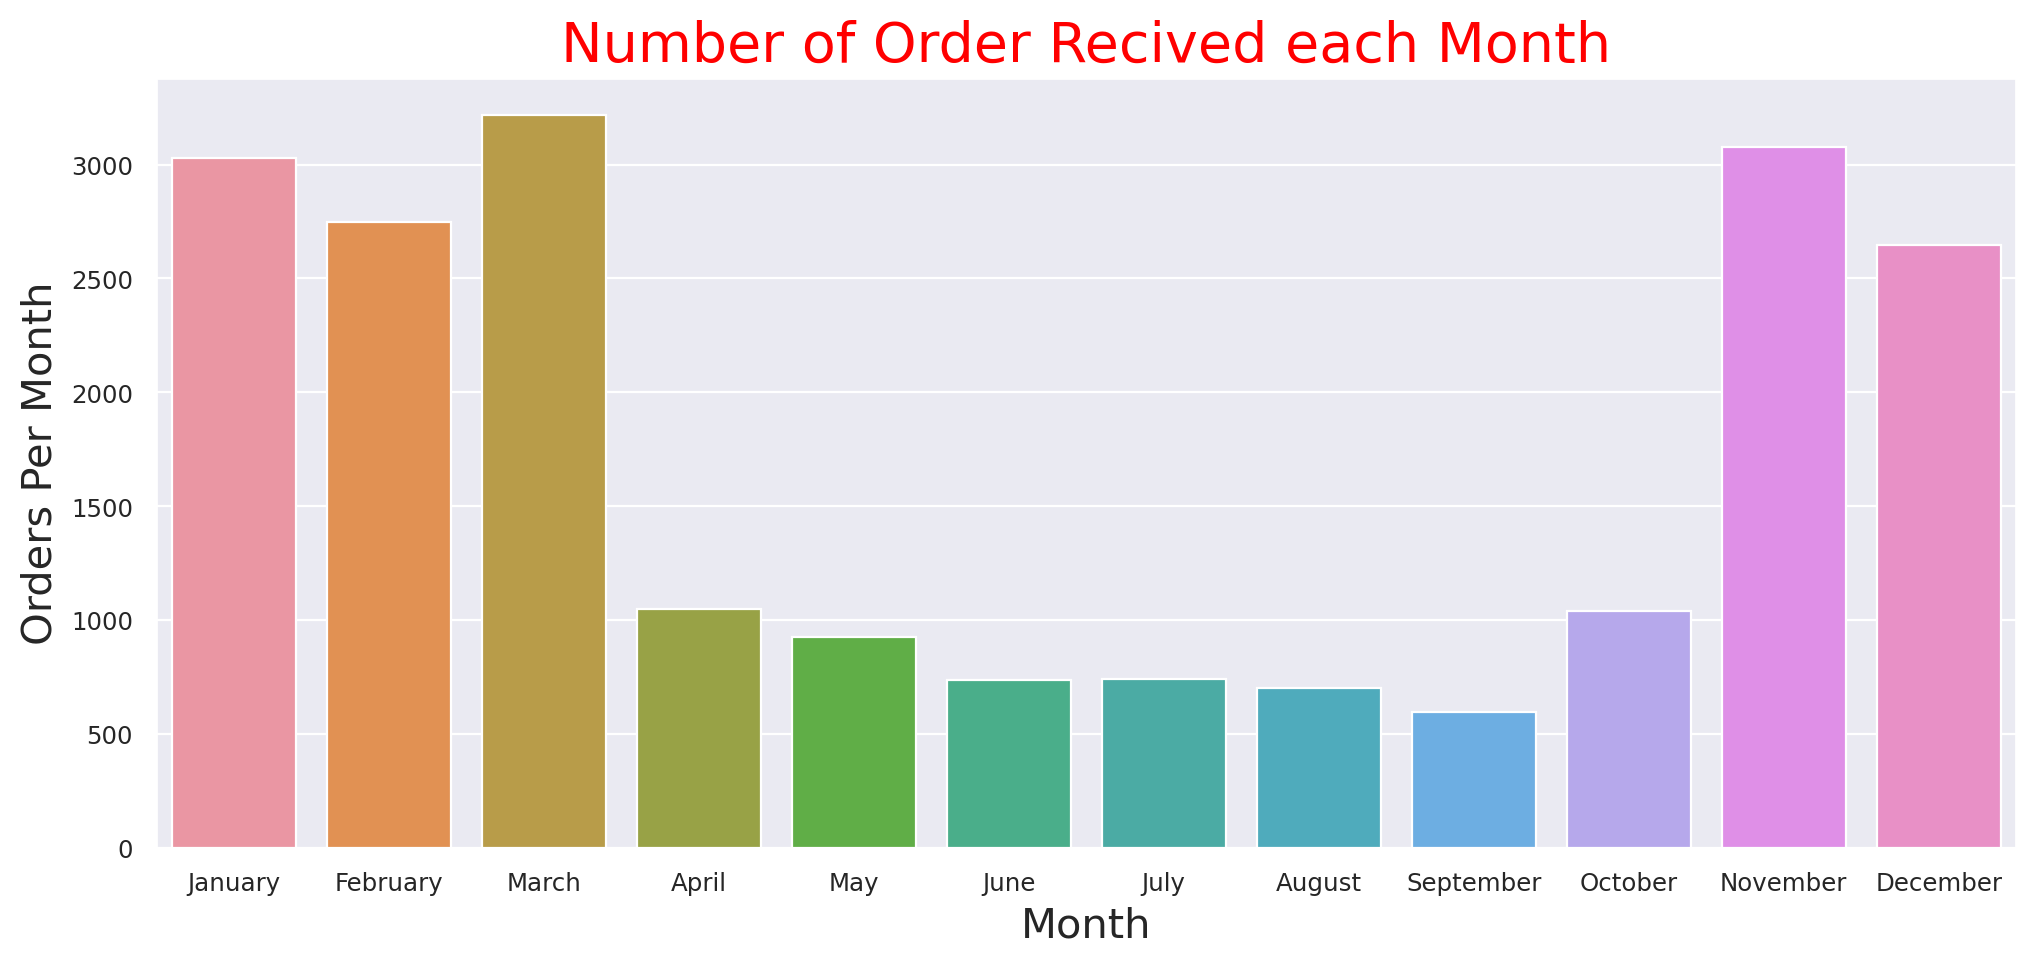

In [ ]:
#Per Month Transaction
m_Tran = df.groupby('month')[
    'Transaction'].count().reset_index()

m_Tran.loc[:, 'MonthOrder'] = [
    4, 8, 12, 2, 1, 7, 6, 3, 5,
    11, 10, 9
]

m_Tran.sort_values('MonthOrder',
                  inplace=True)


plt.figure(figsize=(12, 5))
sns.barplot(data=m_Tran,
            x="month",
            y="Transaction")

plt.xlabel('Month', size=15)
plt.ylabel('Orders Per Month',
           size=15)

plt.title('Number of Order Recived each Month',
          color = 'red',
          size=20)

plt.show()

Most Transaction were in **March, January, February, Navember and December**

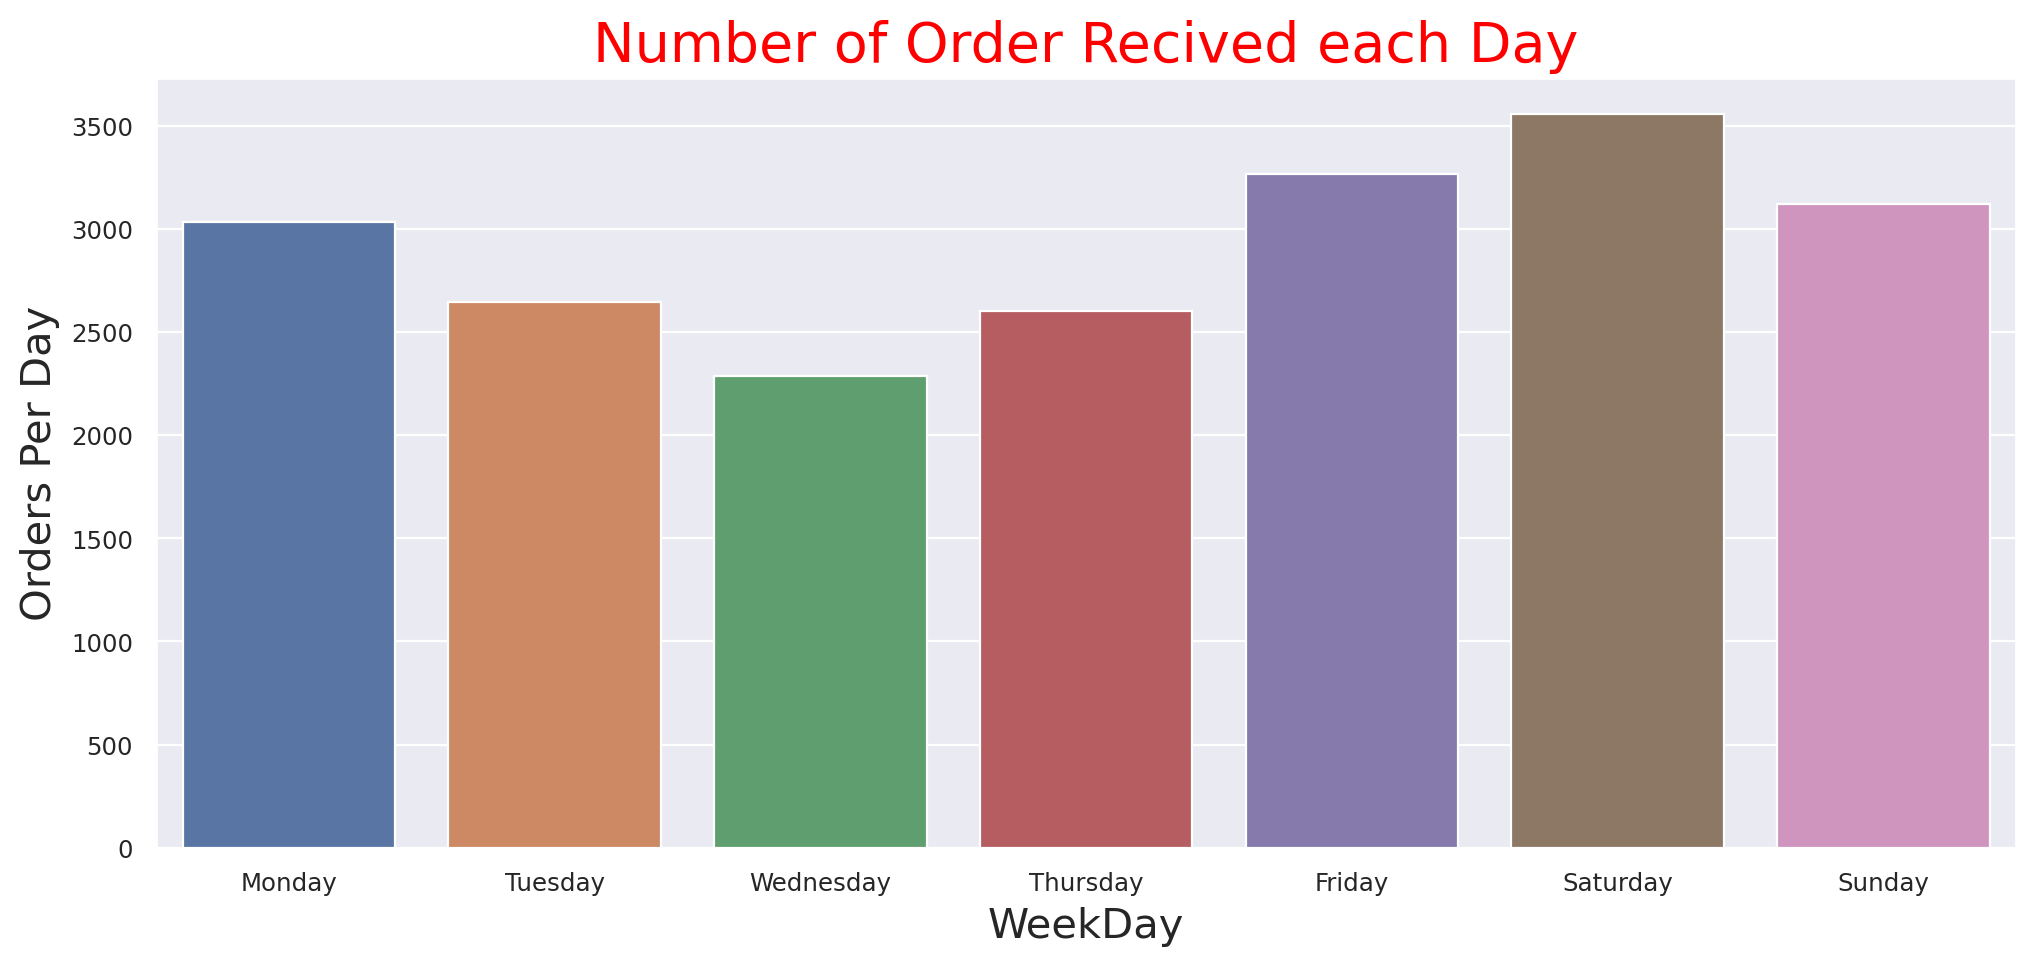

In [ ]:
WeekTran = df.groupby('weekday')[
    'Transaction'].count(
    ).reset_index()

WeekTran.loc[:, 'WeekOrder'] = [
    4,0,5,7,3,1,2]

WeekTran.sort_values('WeekOrder',
        inplace=True)

plt.figure(figsize=(12, 5))
sns.barplot(data=WeekTran,
            x="weekday",
            y="Transaction")

plt.xlabel('WeekDay', size=15)
plt.ylabel('Orders Per Day',
           size=15)

plt.title('Number of Order Recived each Day', color = 'red', size=20)

plt.show()

**People Order more on Weekends**

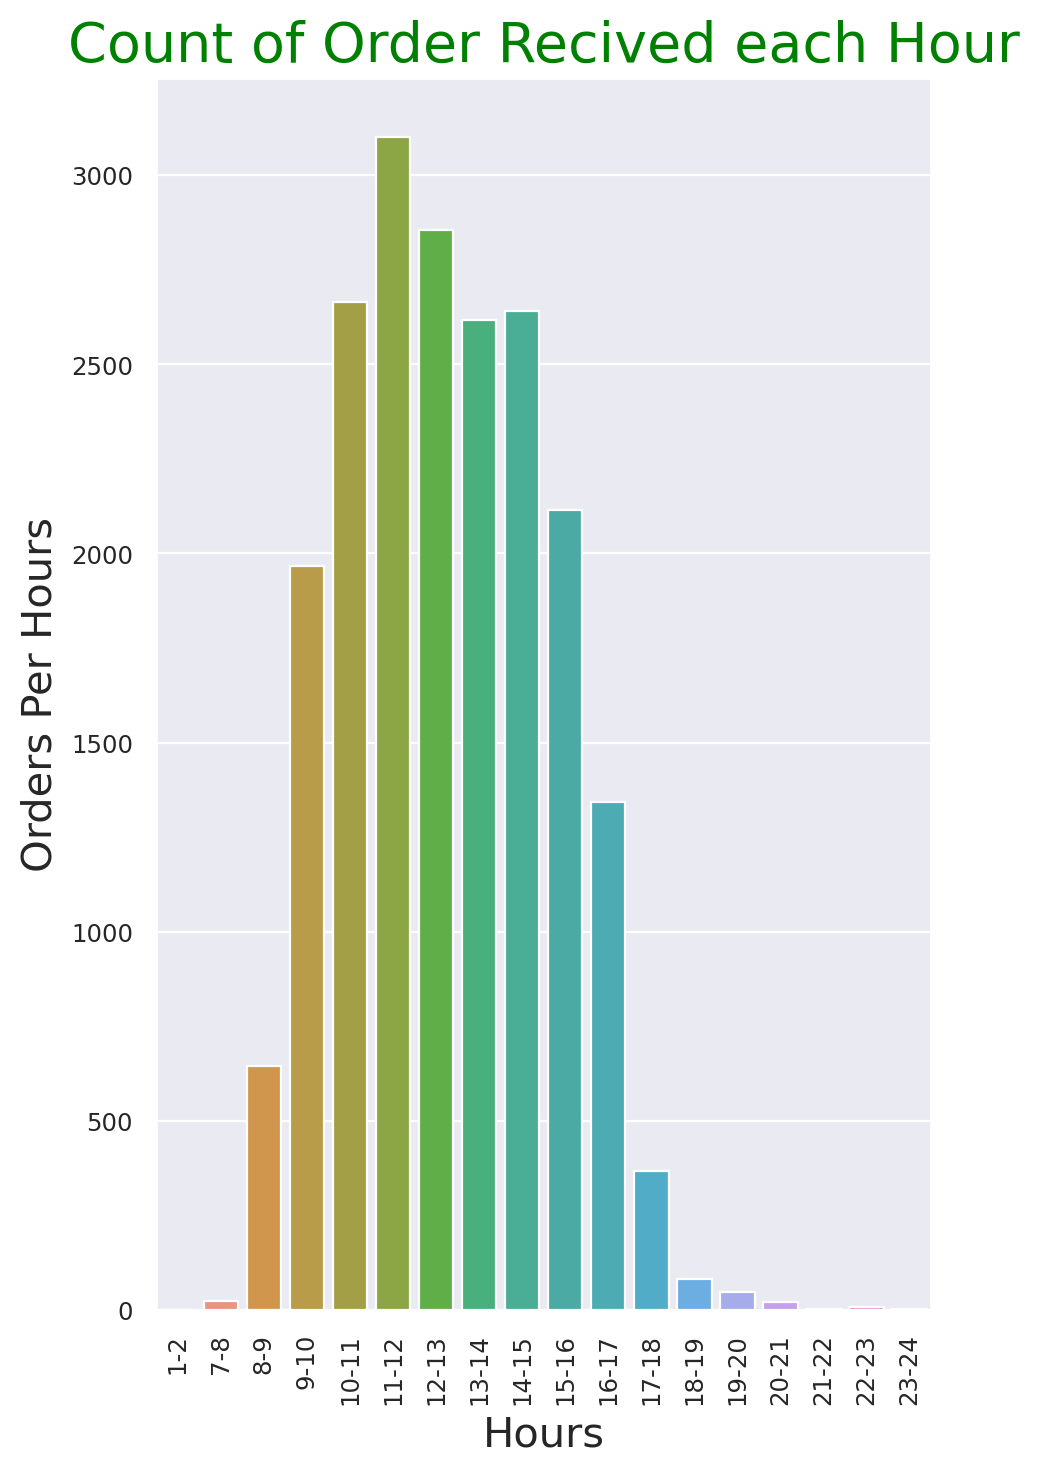

In [ ]:
hourTran = df.groupby('hour')[
    'Transaction'].count(
    ).reset_index()

hourTran.loc[:, 'hourOrder'] = [
    1,10,11,12,13,14,15,16,17,
    18,19,20,21,22,23,7,8,9
]

hourTran.sort_values('hourOrder',
                     inplace=True)


plt.figure(figsize=(5, 8))
sns.barplot(data=hourTran,
            x="hour",
            y="Transaction")

plt.xlabel('Hours', size=15)
plt.ylabel('Orders Per Hours',
           size=15)

plt.xticks(rotation=90)

plt.title('Count of Order Recived each Hour',
          color = 'green',
          size=20)

plt.show()

People order more during the afternoon, since there are a lot of maximum order percentage between 12-5.

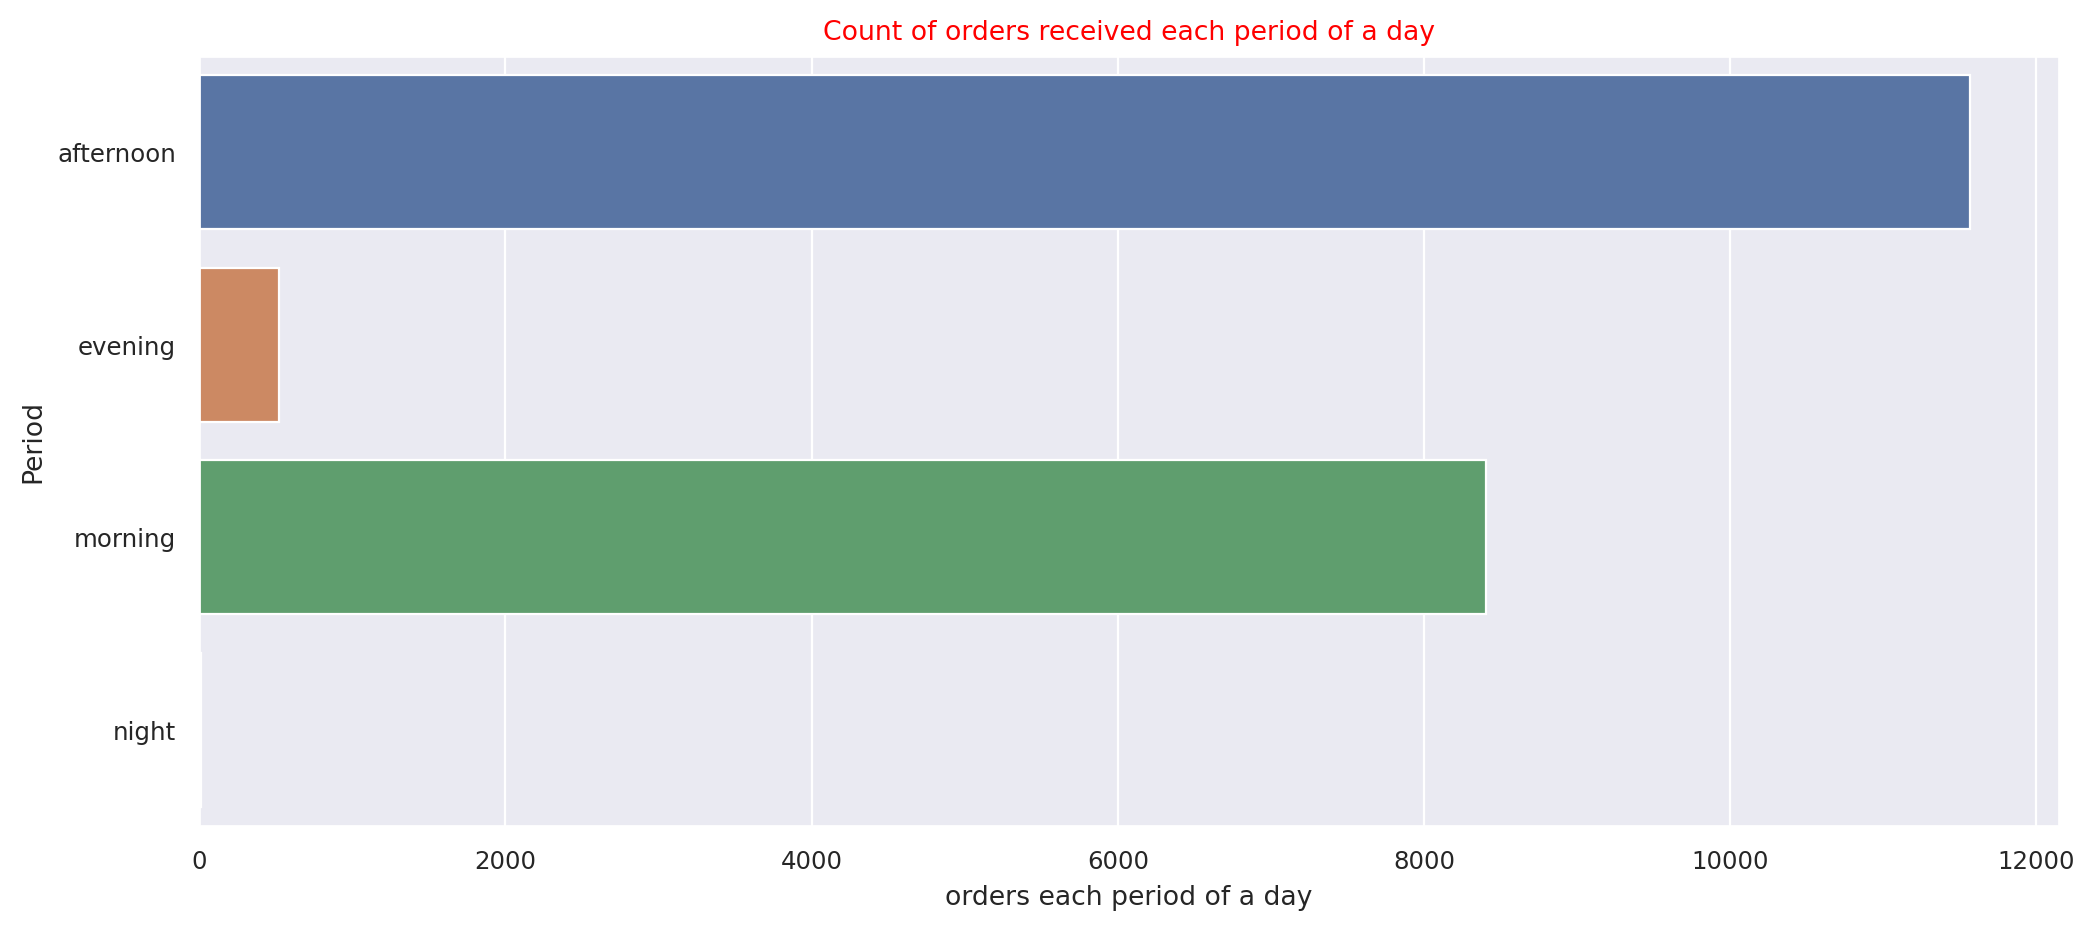

In [ ]:
daytran = df.groupby('period_day')[
    'Transaction'].count().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=daytran,
           x='Transaction',
           y='period_day')

plt.ylabel('Period')
plt.xlabel('orders each period of a day')

plt.title('Count of orders received each period of a day',
          color='red')

plt.show()

People prefer order in the morning and afternoon.

****

# 04: Apriori Algorithm

In [ ]:
Transaction_str = df.groupby([
    'Transaction',
    'Item'])['Item'].count(
    ).reset_index(name='Count')

Transaction_str

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [ ]:
my_basket = Transaction_str.pivot_table(
    index='Transaction',
    columns='Item',
    values='Count',
    aggfunc='sum').fillna(0)

my_basket

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Convert all positive values as 1, Negative as 0

def myencode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


mybasket_sets = my_basket.applymap(myencode)

mybasket_sets.sample(5)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
4059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


****

# 05: Apriori Analysis

Using the apriori algorithm with min_support = 0.01(1% of 9465). It means the item should be present in atleast 94 transaction out of 9465 transaction only when we considered that item in frequent item set

In [ ]:
my_freq_items = apriori(
    mybasket_sets,
    min_support=0.01,
    use_colnames=True)

my_freq_items

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(coffee, cake, bread)"
59,0.011199,"(coffee, pastry, bread)"


****

# 06: Association Rules

Now making the rules from frequent item set generated above

In [ ]:
rules = association_rules(
    my_freq_items,
    metric='lift',
    min_threshold=1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
2,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
3,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
4,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
5,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
6,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236


Arranging the data from highest to lowest with respect to "confidence"

In [ ]:
rules.sort_values('confidence',
    ascending= False,
    inplace= True)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
31,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
23,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
25,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
12,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


****

# 07: Making Recommendation

In [ ]:
mybasket_sets['coffee'].sum()

4528

In [ ]:
mybasket_sets['brownie'].sum()

379